In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import matplotlib.pyplot as plt
traindata = pd.read_csv('/content/drive/MyDrive/data/titanic/train.csv')
testdata = pd.read_csv('/content/drive/MyDrive/data/titanic/test.csv')
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
column_names = traindata.columns.tolist()
print(column_names)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [7]:
traindata.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
## datatype info
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Age', ylabel='Density'>

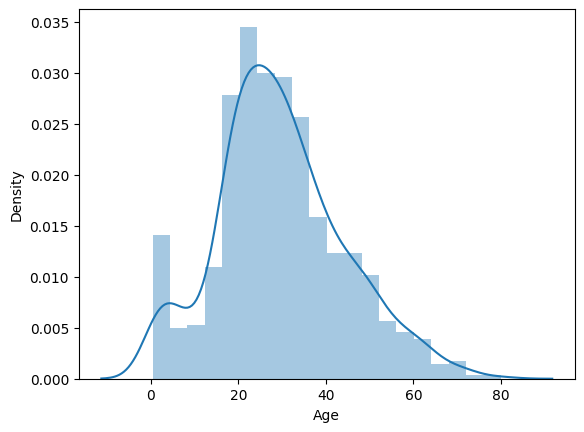

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
## numerical attributes
sns.distplot(traindata['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

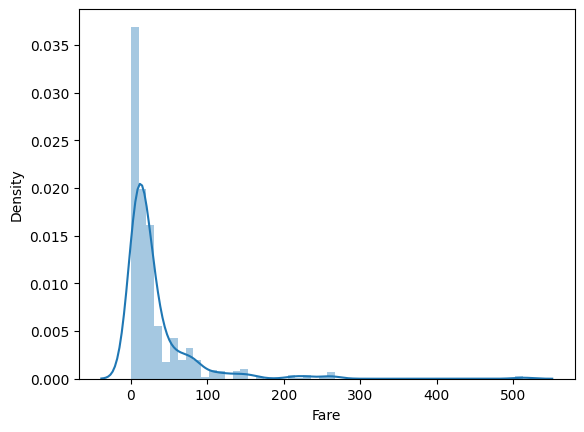

In [14]:
sns.distplot(traindata['Fare'])

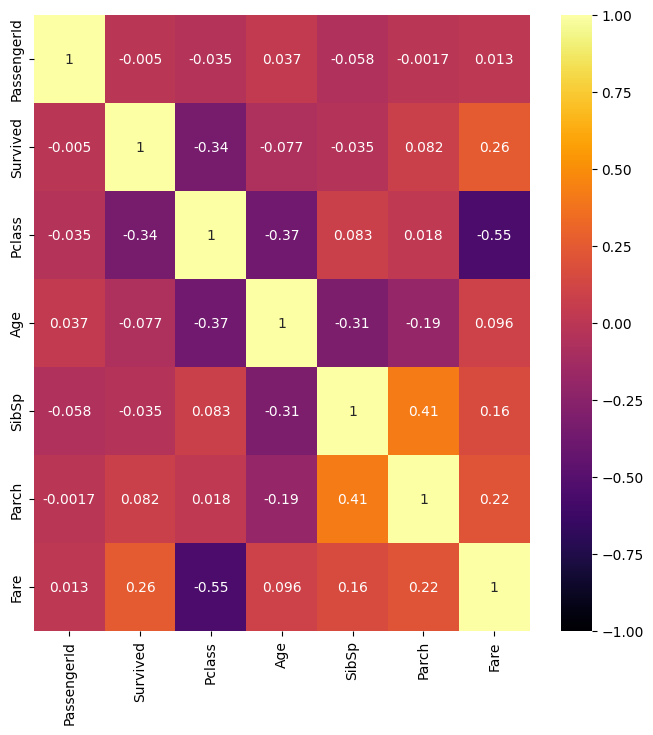

In [15]:
##We can see outliers in age and fare
plt.figure(figsize=(8,8))
sns.heatmap(traindata.corr(), vmax=1,vmin=-1,annot=True,cmap='inferno')
plt.show()

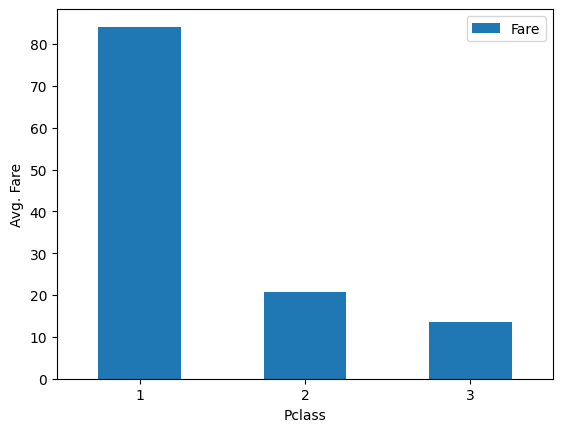

In [17]:
class_fare = traindata.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

In [18]:
def handle_non_numerical_data(df):

    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:

            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them.
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int,df[column]))

    return df

In [19]:
y_target = traindata['Survived']
# Y_target.reshape(len(Y_target),1)
x_train = traindata[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked', 'Ticket']]

x_train = handle_non_numerical_data(x_train)
x_train.head()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
0,3,22.0,0,1,0,7.2500,1,134
1,1,38.0,1,1,0,71.2833,0,639
2,3,26.0,1,0,0,7.9250,1,415
3,1,35.0,1,1,0,53.1000,1,77
4,3,35.0,0,0,0,8.0500,1,71


In [24]:
fare = pd.DataFrame(x_train['Fare'])
# Normalizing
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
x_train['Fare'] = newfare
x_train.isnull().sum()

Pclass        0
Age         177
Sex           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Ticket        0
dtype: int64

In [26]:
# Filling the NAN values with the median values in the datasets
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].median())
print("Number of NULL values" , x_train['Age'].isnull().sum())
print(x_train.head(3))

Number of NULL values 0
   Pclass   Age  Sex  SibSp  Parch      Fare  Embarked  Ticket
0       3  22.0    0      1      0  0.014151         1     134
1       1  38.0    1      1      0  0.139136         0     639
2       3  26.0    1      0      0  0.015469         1     415


In [27]:
#Replacing male with 0 and female with 1 for handling non numeric data
x_train['Sex'] = x_train['Sex'].replace('male', 0)
x_train['Sex'] = x_train['Sex'].replace('female', 1)

corr = x_train.corr()
corr.style.background_gradient()

,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Ticket
Pclass,1.000000,-0.339898,-0.131900,0.083081,0.018443,-0.549500,0.294745,0.005585
Age,-0.339898,1.000000,-0.081163,-0.233296,-0.172482,0.096688,-0.035402,0.009809
Sex,-0.131900,-0.081163,1.000000,0.114631,0.245489,0.182333,0.016775,-0.037979
SibSp,0.083081,-0.233296,0.114631,1.000000,0.414838,0.159651,0.010118,-0.074007
Parch,0.018443,-0.172482,0.245489,0.414838,1.000000,0.216225,-0.057872,-0.081705
Fare,-0.549500,0.096688,0.182333,0.159651,0.216225,1.000000,-0.230858,0.001055
Embarked,0.294745,-0.035402,0.016775,0.010118,-0.057872,-0.230858,1.000000,-0.056631
Ticket,0.005585,0.009809,-0.037979,-0.074007,-0.081705,0.001055,-0.056631,1.000000


<Axes: xlabel='Pclass', ylabel='Fare'>

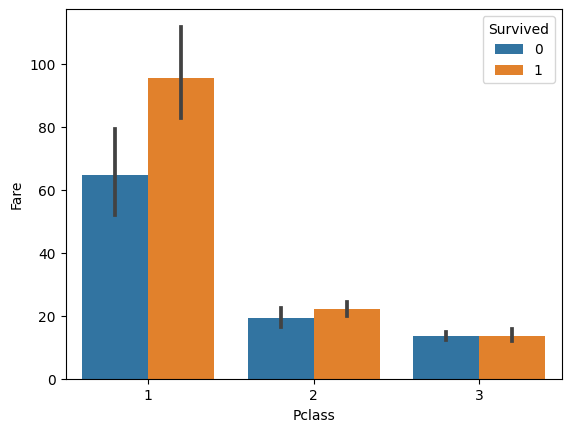

In [25]:
sns.barplot(data=traindata, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

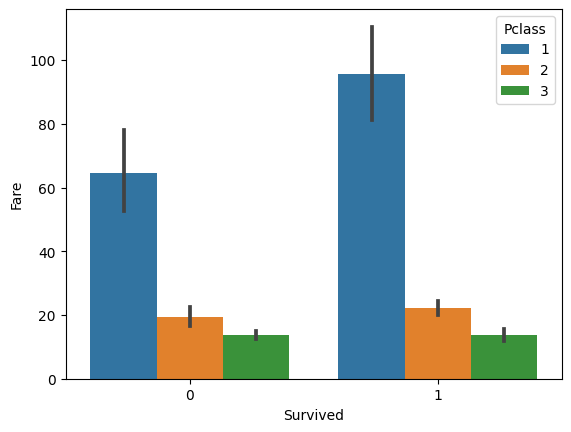

In [32]:
sns.barplot(data=traindata, x='Survived', y='Fare', hue='Pclass')

In [47]:
# Dividing the data into train and test data set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_target, test_size = 0.4, random_state = 40)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
print(clf.predict(X_test))
print("Accuracy: ",clf.score(X_test, Y_test)*100,"")

[1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1
 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0]
Accuracy:  80.95238095238095 


In [40]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
### Preprocessing on the test data
testdata = testdata[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare', 'Ticket', 'Embarked']]
testdata = handle_non_numerical_data(testdata)

fare = pd.DataFrame(testdata['Fare'])
min_max_scaler = preprocessing.MinMaxScaler()
newfare = min_max_scaler.fit_transform(fare)
testdata['Fare'] = newfare
testdata['Fare'] = testdata['Fare'].fillna(testdata['Fare'].median())
testdata['Age'] = testdata['Age'].fillna(testdata['Age'].median())
testdata['Sex'] = testdata['Sex'].replace('male', 0)
testdata['Sex'] = testdata['Sex'].replace('female', 1)
testdata.isnull().sum()
print(testdata.head())

   Pclass   Age  Sex  SibSp  Parch      Fare  Ticket  Embarked
0       3  34.5    0      0      0  0.015282     163         1
1       3  47.0    1      1      0  0.013663     126         2
2       2  62.0    0      0      0  0.018909     327         1
3       3  27.0    0      0      0  0.016908     269         2
4       3  22.0    1      1      1  0.023984     107         2


In [48]:
clf.fit(X_test, Y_test)
print(clf.predict(X_test))
print("Accuracy: ",clf.score(X_test, Y_test)*100,"%")

[0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0]
Accuracy:  100.0 %
